In [48]:
import numpy as np
import matplotlib.pyplot as plt
from codes.plot_utils import plot_pretty, plot_line_points
from codes.cosmology import d_L_vectorized
from codes.constants import clight
from codes.interpolation import *
from scipy.special import gamma
from HW05_starter import *

%matplotlib inline
plot_pretty(fontsize=12)

### Exercise 2. Volume of the $D$-dimensional unit sphere using Monte-Carlo method (15 points)

Volume of $D$-dimensional sphere of radius $r$: 

$$V_{\rm D}(r)=\frac{2r^D\pi^{D/2}}{D\,\Gamma(D/2)},$$

where $\Gamma(x)$ is the incomplete gamma function. 

#### Task 2a. Routine to estimate volume of $D$-dimensional sphere using Monte Carlo method (8 points)

Write a routine that estimates $V_{\rm D}(r)$ using Monte Carlo method. As input routine should have <tt>r</tt> - the radius of the sphere, <tt>d</tt> - the number of dimensions, and <tt>nrnd</tt> - the number of random samples to use: 

***Hint:*** to understand how to estimate the volume of a sphere, it is useful to think about a ratio of volumes of the sphere and the cube, in which the sphere is inscribed. 

In [186]:
def dsphere_volume(r = 1., d=1, nrnd=1):
    '''
    Parameters:
    -----------
    r: real
        radius of the sphere
    d: integer
        number of dimensions
    nrnd: integer
        number of Monte Carlo samples to use in the estimate

    Returns:
    --------
    real number - estimate of the d-dimensional sphere volume
    '''
    # Test points - uniform draw points from cube
    xt = np.random.uniform(low = -r, high = r, size = (nrnd, d))
    prop_sphere = ((xt ** 2).sum(axis = 1) <= r**2).sum() / nrnd

    vol_cube = (2 * r) ** d
    vol_sphere = prop_sphere * vol_cube
    
    return vol_sphere

dsphere_volume_vec = np.vectorize(dsphere_volume)

In [187]:
dsphere_volume(1, 0, 10)

1.0

In [23]:
def dsphere_volume_test(r = 1, nrnd = 100):
    #d0 case yields 1 for all r
    frac_err_0 = abs(1 - dsphere_volume(r, 0, 1000)/1) * 100
    frac_err_1 = abs(1 - dsphere_volume(r, 1, 1000)/(2*r)) * 100
    frac_err_2 = abs(1 - dsphere_volume(r, 2, 1000)/(np.pi * r**2)) * 100
    frac_err_3 = abs(1 - dsphere_volume(r, 3, 1000)/(np.pi * 4/3 * r**3)) * 100
    print("Fractional Errors")
    print("Dimension 0: {}%".format(frac_err_0))
    print("Dimension 1: {}%".format(frac_err_1))
    print("Dimension 2: {}%".format(frac_err_2))
    print("Dimension 3: {}%".format(frac_err_3))
        

In [22]:
dsphere_volume_test(nrnd = 100)

Fractional Errors
Dimension 0: 0.0%
Dimension 1: 0.0%
Dimension 2: 0.0766282161837939%
Dimension 3: 0.6495860113146179%


#### Task 2b. Dependence of the estimate accuracy on $D$ (4 points)

Fix <tt>nrnd</tt> and <tt>r</tt> (say to $r=1$), and use your routine to estimate $V_{\rm D}(r)$ for a series of several values of $D$. Plot estimated $V_{\rm D}(r)$ as a function of $D$ as scatter plot and correct $V_{\rm D}(r)$ using the above formula as a line. How does accuracy of the estimate depend on $D$? (plot fractional difference of the estimates and correct values if needed). Provide a brief interpretation/discussion of this result.

In [74]:
def volume_plot(r = 1, dimlim = 12, nrnd = 10000):
    """
    Compute Volume of n-dimensional sphere of radius r
    for dimensions from 1 to dimlim using nrnd sample points.
    Plot dimension against volume. 
    """
    dims = np.arange(1, dimlim + 1)
    dims2 = np.arange(1, dimlim + 1, .2)
    exact = dsphere_volume_exact(r, dims2)
    approx = dsphere_volume_vec(r, dims, nrnd)
    plot_line_points(dims2, exact, xp = dims, yp = approx, points = True,
                     xlabel = "Dimensions", ylabel = "Volume", 
                     pcol = "black", 
                     plot_title = "Volume of " + r"$n-$" + "dimensional sphere",
                     legend = "Exact", plegend = "Approximation")
    

In [1]:
def dsphere_volume_exact(r=1., dim=1):
       return 2. * r**dim * np.pi**(0.5*dim) / (gamma(0.5*dim) * dim)

In [146]:
def frac_err_plot(r = 1, dimlim = 12, nrnd = 50000):
    """
    Compute Volume of n-dimensional sphere of radius r
    for dimensions from 1 to dimlim using nrnd sample points.
    Plot dimension against fractional error. 
    """
    dims = np.arange(1, dimlim + 1)
    exact = dsphere_volume_exact(r, dims)
    approx = dsphere_volume_vec(r, dims, nrnd)
    frac_err = abs(1 - approx / exact)
    plot_line_points(dims, frac_err, xlabel = "Dimensions", 
                     ylabel = "Frac. Error", 
                     plot_title = "Fractional Error of Volume of " + r"$n-$" + "dimensional sphere")
    

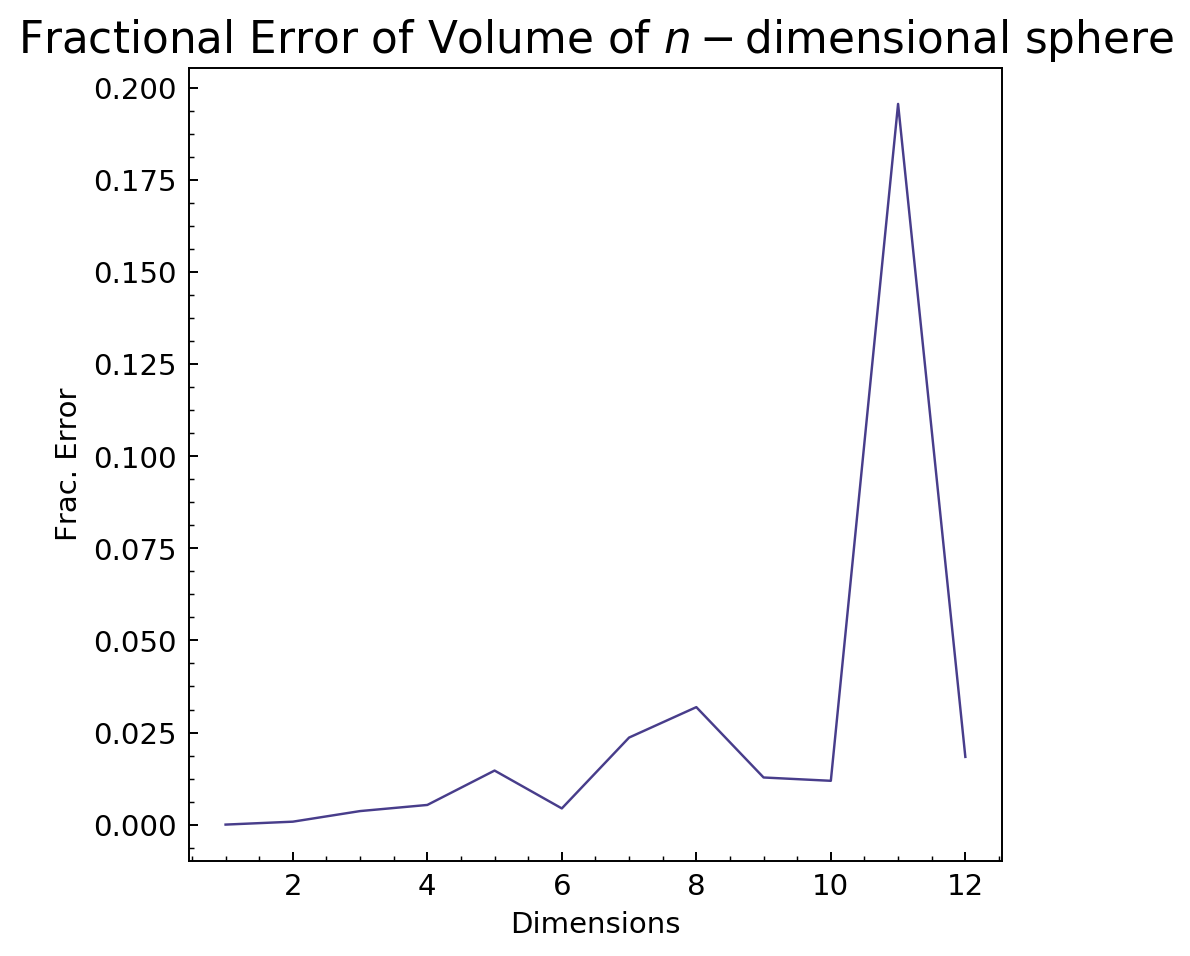

In [149]:
frac_err_plot()

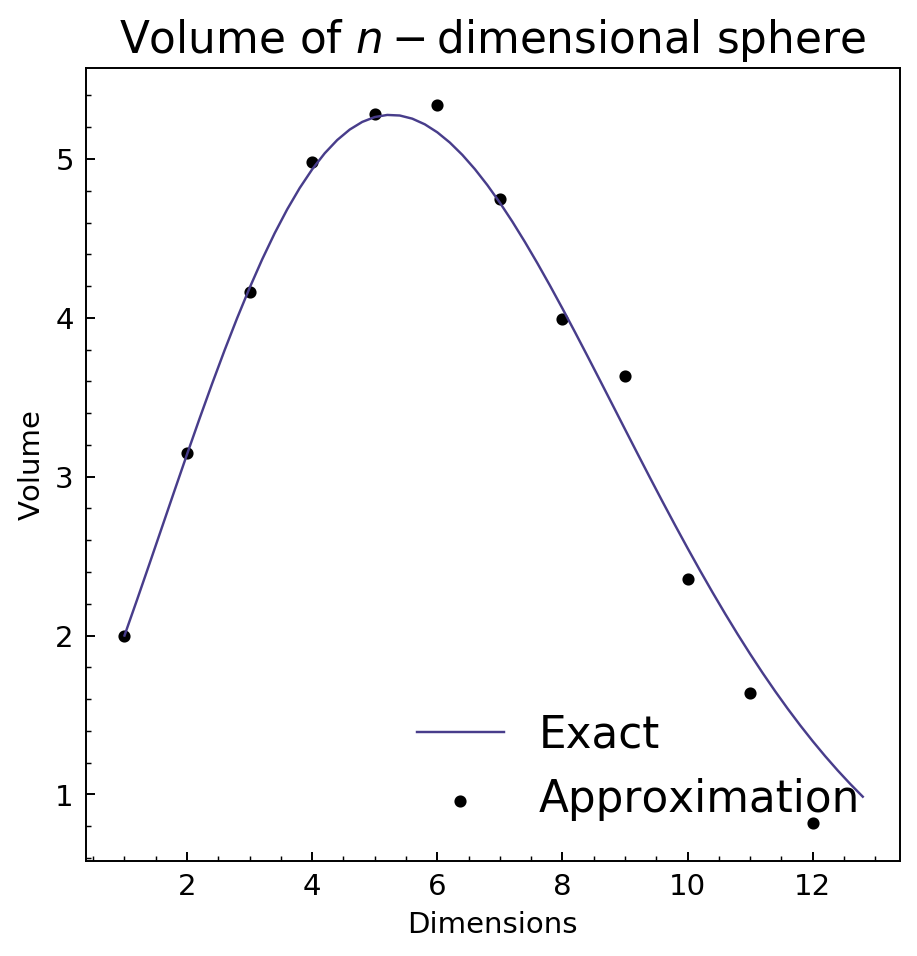

In [75]:
volume_plot()

**Discussion**: Note that the approximation is non deterministic, so we will likely get different outputs from running the approximation multiple times. However, the approximation, I think, is consistent, so for sufficiently large number of points, the approximation should converge to the desired volume. 

We note that the accuracy tends to decrease as we increase the number of dimensions. This has to do with the fact that the volume of the $n$-dimensional cube increases while the volume of the $n$-dimensional sphere decreases, which implies that a smaller proportion of points are within the sphere. This is similar to the accept-reject method of rejection sampling of a distribution, where we lose efficiency by rejecting lots of samples. I think another way of looking at it is through degrees of freedom. Introducing more dimensionality creates a need to increase the number of samples since more points are able to live in the space. 

We rule out the number of samples `nrnd` as a factor for this decreased accuracy below. 

#### Task 2c.  Dependence of the estimate accuracy on <tt>nrnd</tt> (3 points)

Fix $D$ and $r$ to the values you like and compute the absolute value of the fractional difference of your estimate from the correct result, $\epsilon=\vert 1-V_{\rm D,est}/V_{\rm D, exact}\vert$ for a series of <tt>nrnd</tt>. Plot $\epsilon$ as a function of <tt>nrnd</tt>. Discuss the trend you observe and your interpretation of it. 

In [164]:
# We fix radius to be 1 and dimensionality to be 6. 

def frac_err_plot2(r = 1, dimlim = 6, nrnd = 10 ** np.arange(1, 6)):
    """
    Compute Volume of n-dimensional sphere of radius r
    for dimensions from 1 to dimlim using nrnd sample points.
    Plot number of samples against fractional error. 
    """
    exact = dsphere_volume_exact(r, dimlim)
    approx = dsphere_volume_vec(r, dimlim, nrnd)
    frac_err = abs(1 - approx / exact)
    plt.scatter(nrnd, frac_err)
    plt.xlabel("Number of Samples")
    plt.xscale("log")
    plt.ylabel("Frac. Error")
    plt.title("Fractional Error of Volume of 6 dimensional sphere")

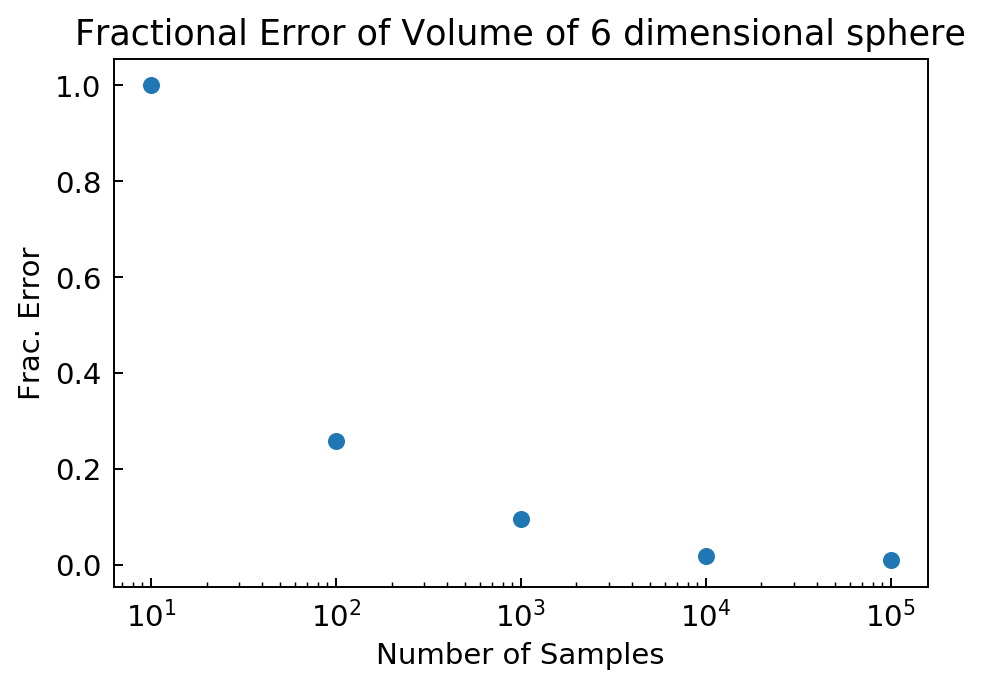

In [166]:
frac_err_plot2()

**Discussion**: Accuracy improves for large number of samples. 

We get convergence for large $n$. For finite $n$, the proportion is an estimate and is sensitive to the number of samples present. It's possible that our distribution of samples **for finite $n$** is not uniform (perhaps slightly more points outside the sphere than should be), so the proportion may be a bit off, but for large $n$, this effect is mitigated. 